In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

%matplotlib inline

## Data-preparatie

In [2]:
ds = load_iris()
ds.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [3]:
X = ds.data
X.shape

(150, 4)

In [4]:
y = ds.target
y = y == 1
y.shape

(150,)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## We trainen een logistisch regressiemodel

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = log_reg.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[21,  4],
       [13,  7]], dtype=int64)

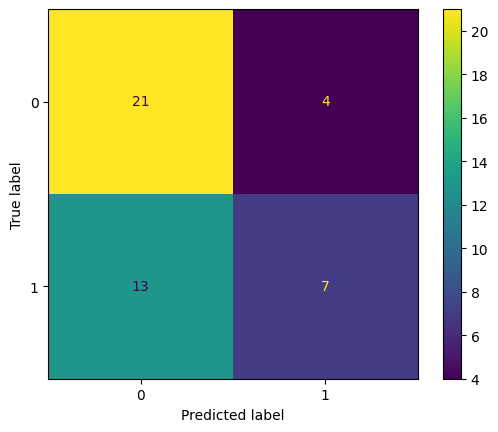

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6363636363636364
0.35
0.45161290322580644


## En nog een tweede model, een SVC

In [12]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc

array([[24,  1],
       [ 1, 19]], dtype=int64)

## Tot slot plotten we de beide ROC-curves

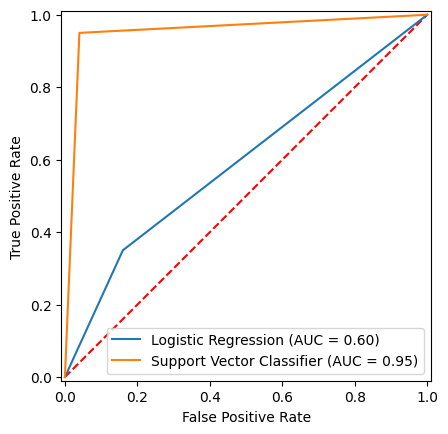

In [13]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fig,ax = plt.subplots()

plt.plot([0,1], [0,1], color='red', linestyle='--')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot(ax=ax)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Support Vector Classifier')
disp.plot(ax=ax)